### 读取train 数据集

# 读入两份不同的数据集， 分别用rf, et得到预测结果， 画图对比输出

In [94]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# 使用 74分的数据集
df1 = pd.read_csv("./trainset/pcdata_0611.csv")

# 使用自己的数据集
df2 = pd.read_csv("./train/train.csv")

# df_final.shape
# df_final.isnull().sum()
# df_final.tail()

In [95]:
dfs = [df1, df2]

In [96]:
# 输入原始数据集 包含 train set 集， 并有label列
def get_train_set(df_final):
        
    final_train_data = df_final[~((df_final.year==2016)&(df_final.month==10))].drop(['power_consumption'],1)
    final_train_data = final_train_data.astype(int)
    final_test_data = df_final[((df_final.year==2016)&(df_final.month==10))].drop(['power_consumption'],1)
    final_test_data = final_test_data.astype(int)
    train_target = df_final[~((df_final.year==2016)&(df_final.month==10))][['power_consumption']]
    
    # # strcolumns = ['dow','doy','day','month','year','isworkday','season']
    # strcolumns = ['dow','doy','day','month','year','season','isholiday']
    
    # train = final_train_data.copy()
    # train[strcolumns] = train[strcolumns].astype(str)
    # test = final_test_data.copy()
    # test[strcolumns] = test[strcolumns].astype(str)
    
    # train_target
    
    train_X, train_y = final_train_data, train_target
    test_X = final_test_data
    return train_X, train_y ,test_X


def get_predict(model, train_X, train_y, test_X):
    # test_X
    # {'n_estimators': 200, 'max_depth': 4}
    # {'max_features': 'log2', 'n_estimators': 600, 'max_depth': 12}
    
    # reg = RandomForestRegressor(n_estimators=600, max_features='log2', max_depth=12 )
    # reg = RandomForestRegressor(n_estimators=200)
#     reg = model
    model.fit(train_X,train_y)
    
    # y_predict = reg.best_estimator_.predict(test_X)
    y_predict = model.predict(test_X) # bagging_reg
    return y_predict


from datetime import datetime 

def timetransform(t):
        t = str(t)[0:10]
        
        try:
            time = datetime.strptime(t, '%Y-%m-%d')
            t = time.strftime('%Y%m%d')
        except:
            pass
        return t

def save_predict(y_predict, filename):

        # step 3
    commit_df = pd.date_range('2016/10/1', periods=31, freq='D')
    commit_df = pd.DataFrame(commit_df)
    commit_df.columns = ['predict_date']
    commit_df['predict_power_consumption'] = pd.DataFrame(y_predict).astype('int')
    # y_predict

    curtime = datetime.today()
    strtime = curtime.strftime('%m%d')
    
    
    commit_df['predict_date'] = commit_df['predict_date'].apply(timetransform)
    
    #     commit_df.head()
    # predict_et_pcdata_0611
    # commit_df.to_csv('./predict/predict_' + strtime + '.csv',index=False) # to 记录下每一次结果 
    commit_df.to_csv(filename, index=False) # 同时生成待提交的结果文件，每次新结果覆盖老文件
    

In [97]:

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# {'max_features': 0.8, 'n_estimators': 800}
mods = [ExtraTreesRegressor(n_estimators=400), 
        RandomForestRegressor(n_estimators=400),
       ]

fs = ['./predict/predict_et_0612','./predict/predict_rf_0612']

for ds in dfs:
    train_X, train_y ,test_X = get_train_set(ds)
    for mod, filename in zip(mods, fs):
        predict = get_predict(mod, train_X, train_y ,test_X)
        save_predict(predict, filename)

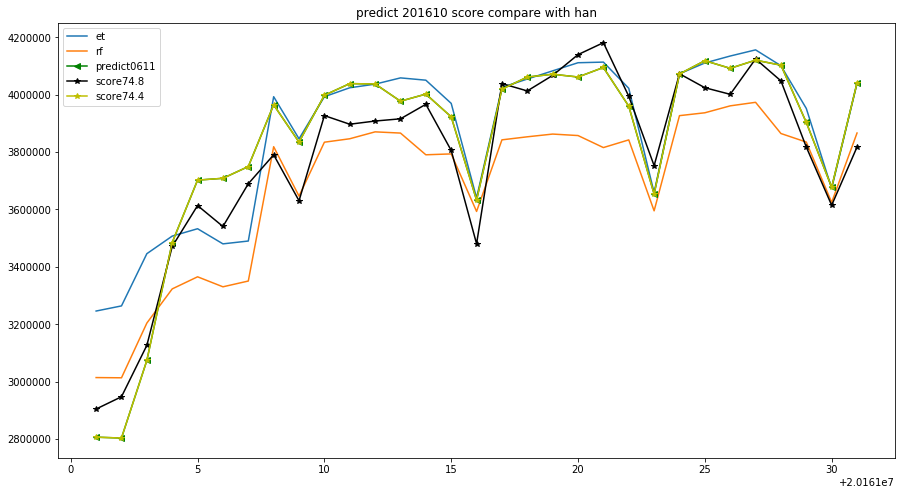

In [98]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# 对比寒老师的结果
plt.figure(figsize=(15,8))

for predict in fs:
    
    prediction = pd.read_csv(predict)
    
    x = prediction['predict_date']#.values
    y = prediction['predict_power_consumption']#.values
    plt.plot(x, y)

# 历史结果参考
prediction = pd.read_csv('./predict/predict_et_train_0611.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-g<')


prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score74.8.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-k*')

prediction = pd.read_csv('./predict/predict_et_train_0611_score_74.4.csv')
x = prediction['predict_date']#.values
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-y*')

plt.title('predict 201610 score compare with han')

plt.legend(['et','rf','predict0611','score74.8','score74.4'])
plt.show()

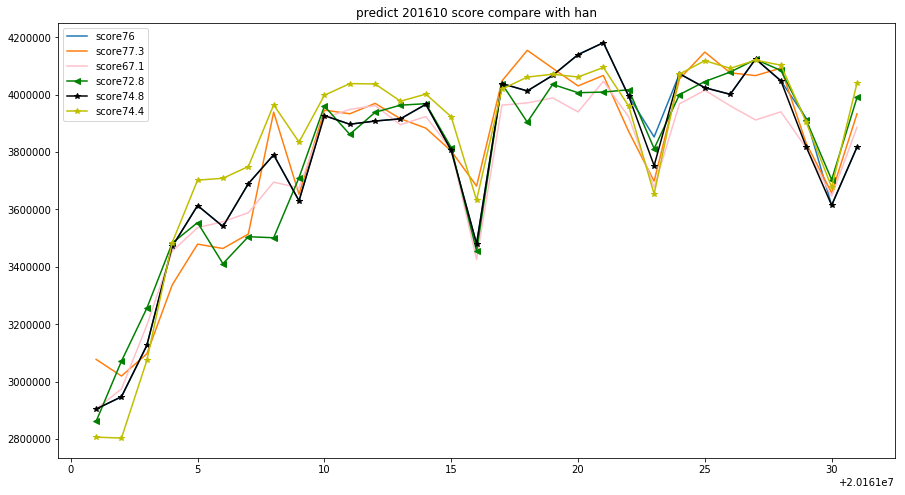

In [41]:
# 比较各次分数

# 对比寒老师的结果
plt.figure(figsize=(15,8))

# for predict in fs:
    
#     prediction = pd.read_csv(predict)
    
#     x = prediction['predict_date']#.values
#     y = prediction['predict_power_consumption']#.values
#     plt.plot(x, y)

# 历史结果参考

prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score76.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y)

prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score77.3.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y)

prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score67.1.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y, color='pink')

prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score72.8.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-g<')


prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score74.8.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-k*')

prediction = pd.read_csv('./predict/predict_et_train_0611_score_74.4.csv')
x = prediction['predict_date']#.values
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-y*')

plt.title('predict 201610 score compare with han')

plt.legend(['score76', 'score77.3','score67.1','score72.8','score74.8','score74.4'])
plt.show()

### 特征重要度排序

 1) doy                            0.180272
 2) isholiday                      0.166851
 3) day                            0.115159
 4) mean                           0.109870
 5) dow                            0.088355
 6) first_half                     0.053265
 7) isworkday                      0.052948
 8) month_period_3                 0.047110
 9) second_half                    0.045698
10) holiday_workday_diff           0.040560
11) week_period_3                  0.023268
12) std                            0.018785
13) month_period_1                 0.012973
14) month_period_2                 0.011850
15) week_period_2                  0.007944
16) week_period_4                  0.007111
17) week_period_1                  0.006500
18) month                          0.004481
19) season                         0.003984
20) year                           0.003014


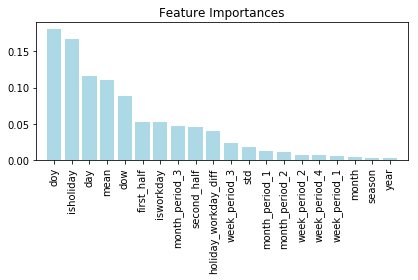

In [42]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# print('Plot feature importances...')
# ax = lgb.plot_importance(gbm, max_num_features=10)
# plt.show()
# 用RF 计算特征重要度

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

feat_labels = train_X.columns[0:]

forest = RandomForestRegressor(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

forest.fit(train_X, train_y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(train_X.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(train_X.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [43]:
# # 特征选择 SelectPercentile

# # from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import SelectKBest

# # selection = SelectPercentile(80) # 按百分比取特征
# selection = SelectKBest(k=30) # 取前k个特征
# train_X = selection.fit(train_X, train_y).transform(train_X)
# test_X = selection.transform(test_X)
# train_X

In [44]:
# # import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.cross_validation import train_test_split
# from sklearn.learning_curve import learning_curve
# from sklearn import metrics
# # import numpy as np
# #模型参数选择，使用GridSearchCV实现


# # train_X, train_y = final_train_data, train_target
# # test_X = final_test_data

# x_train, x_test, y_train, y_test=train_test_split(train_X, train_y ,test_size=0.33)

# #建模

# """
# LR模型可调的参数,没几个能调的，gs调参只能输入list，不能对str进行选择。

# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
#                    intercept_scaling=1, class_weight=None, random_state=None, 
#                    solver='liblinear', max_iter=100, multi_class='ovr', 
#                    verbose=0, warm_start=False, n_jobs=1)

#         solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}, default: ‘liblinear’
# """

# # param_LR= {'C':[0.1,1,2]}

   
# # gsearch_LR = GridSearchCV(estimator = LogisticRegression(penalty='l1',solver='liblinear'),
# #                          param_grid=param_LR,cv=3)
# # gsearch_LR.fit(x_train,y_train)
# # gsearch_LR.grid_scores_, gsearch_LR.best_params_, gsearch_LR.best_score_

# # title='LRlearning{penalty=l1,solver=liblinear,cv=3}'                          
# # plot_learning_curve(LogisticRegression(penalty='l1',solver='liblinear',C=1),
# #                     title=title,cv=10,X=x_train,y=y_train)

# # gsearch_LR.fit(x_train,y_train)

# """
# #gbdt模型
# """
# # param_GBDT= {'learning_rate':[0.1,0.5],
# #             'n_estimators':[100,200,300,400],
# #             'max_depth':[3,4]}

# # gsearch_GBDT = GridSearchCV(estimator =GradientBoostingClassifier(),
# #                          param_grid=param_GBDT,cv=10)
# # gsearch_GBDT.fit(x_train,y_train)
# # #gsearch_GBDT.grid_scores_
# # gsearch_GBDT.best_params_
# # gsearch_GBDT.best_score_
# # # 最佳参数：'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3

# # title='GDBTlearning{n_estimators: 200, learning_rate: 0.1, max_depth: 3}'
# # plot_learning_curve(estimator=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3),
# #                     title=title,cv=2,X=x_train,y=y_train)
# # # 比LR好那么一点点


# """
# #rf建模
# """
# # {'n_estimators': [10, 20, 50, 80, 100, 120, 160, 200, 400, 600, 800, 1000],
# #               'max_depth': [3, 5, 7, 9, 12],
# #               'max_features': [0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1, 'auto', 'sqrt', 'log2'],
# #               'min_samples_split':  [8, 9, 10, 11, 12],
# #               'min_samples_leaf': [11,12,20,30]
# #              }

# param_rf= {'n_estimators':[100,200,600,1000],
# #            'max_depth':[3, 5, 7, 9, 12],
#            'max_features': [0.8, 1],
#           }

# gsearch_rf = GridSearchCV(
# #     estimator =RandomForestRegressor(),
#     estimator = ExtraTreesRegressor(),
#     param_grid=param_rf,cv=3)

# gsearch_rf.fit(train_X,train_y)
# #gsearch_GBDT.grid_scores_
# print(gsearch_rf.best_params_)
# print(gsearch_rf.best_score_)

# # # 最佳参数： {'n_estimators': 200, 'max_depth': 4} 

# # title='RFlearning{n_estimators: 200,  max_depth: 4}'
# # plot_learning_curve(estimator=RandomForestRegressor(n_estimators=200, max_depth=4),
# #                     title=title,cv=2,X=x_train,y=y_train)

In [45]:
params = gsearch_rf.best_params_

NameError: name 'gsearch_rf' is not defined

In [ ]:
# step 2 

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from __future__ import division
import numpy as np
# import load_data
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# import xgboost as xgb
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):  # 
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)



# et_params = {
#     'n_jobs': 16,
#     'n_estimators': 100,
#     'max_features': 0.5,
#     'max_depth': 12,
#     'min_samples_leaf': 2,
# }

# rf_params = {
#     'n_jobs': 16,
#     'n_estimators': 100,
#     'max_features': 0.2,
#     'max_depth': 12,
#     'min_samples_leaf': 2,
# }

# xgb_params = {
#     'seed': 0,
#     'colsample_bytree': 0.7,
#     'silent': 1,
#     'subsample': 0.7,
#     'learning_rate': 0.075,
#     'objective': 'reg:linear',
#     'max_depth': 4,
#     'num_parallel_tree': 1,
#     'min_child_weight': 1,
#     'eval_metric': 'rmse',
#     'nrounds': 500
# }

# rd_params={
#     'alpha': 10
# }

# ls_params={
#     'alpha': 0.005
# }


# ntrain = train.shape[0]
# ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 10 # set folds for out-of-fold prediction
# kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
# kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=SEED)


# 用下面几种模型做第一层训练
# xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesRegressor, seed=SEED, params=params)
mod = et.train(train_X, train_y)
predict = et.predict(test_X)

# rf = SklearnWrapper(clf=RandomForestRegressor, seed=SEED, params=params)
# mod = rf.train(train_X, train_y)
# predict = rf.predict(test_X)

# rd = SklearnWrapper(clf=Ridge, seed=SEED, params=rd_params)
# ls = SklearnWrapper(clf=Lasso, seed=SEED, params=ls_params)


filename = './predict/predict_et_0612_gridsearch'
save_predict(predict, filename)



# xg_oof_train, xg_oof_test = get_oof(xg)
# et_oof_train, et_oof_test = get_oof(et)
# rf_oof_train, rf_oof_test = get_oof(rf)
# # rd_oof_train, rd_oof_test = get_oof(rd)
# # ls_oof_train, ls_oof_test = get_oof(ls)




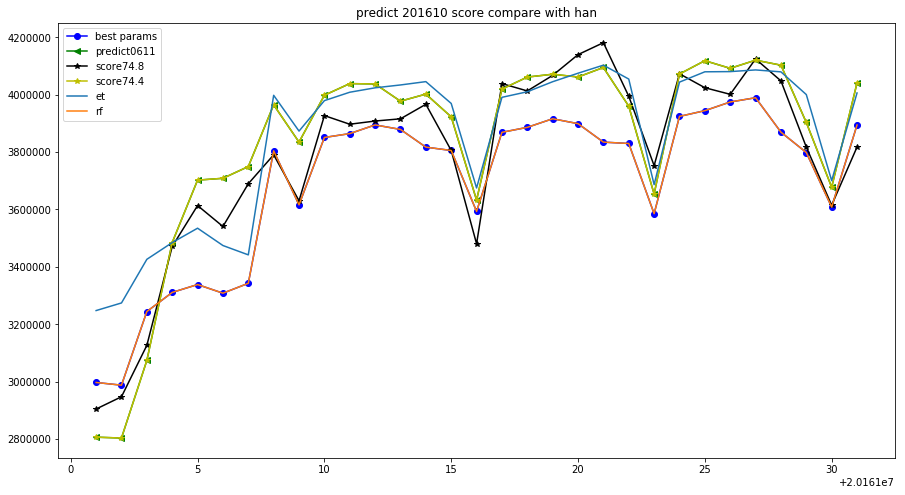

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# 对比寒老师的结果
plt.figure(figsize=(15,8))

prediction = pd.read_csv(filename)
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-bo')

# 历史结果参考
prediction = pd.read_csv('./predict/predict_et_train_0611.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-g<')


prediction = pd.read_csv('./predict/Tianchi_power_predict_table_score74.8.csv')
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-k*')

prediction = pd.read_csv('./predict/predict_et_train_0611_score_74.4.csv')
x = prediction['predict_date']#.values
y = prediction['predict_power_consumption']#.values
plt.plot(x, y,'-y*')



for predict in fs:
    
    prediction = pd.read_csv(predict)
    
    x = prediction['predict_date']#.values
    y = prediction['predict_power_consumption']#.values
    plt.plot(x, y)
    
plt.title('predict 201610 score compare with han')

plt.legend(['best params','predict0611','score74.8','score74.4','et','rf'])
plt.show()